# Modell zur Bachelorarbeit

In [31]:
#from __future__ import print_function, division
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from datetime import datetime
#import math
import dill # Transfer data for analysis

import pypsa

%matplotlib inline

## Import of the previously created network

In [32]:
f = open("network.pickle", 'rb')
network = dill.load(f)
f.close()

In [33]:
f = open("gen_names.pickle", 'rb')
gen_names = dill.load(f)
f.close()

## Visualization

## Map topography

(<matplotlib.collections.PathCollection at 0x223cf25ad30>,
 <matplotlib.collections.LineCollection at 0x223cf25a080>)

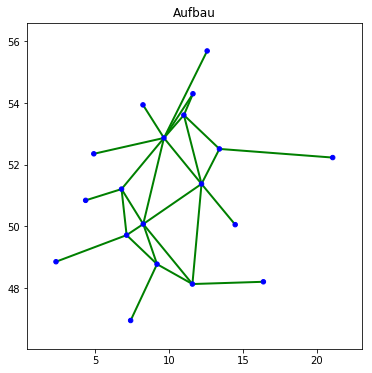

In [34]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(6,6)

network.plot(bus_sizes=20, title="Aufbau")

In [35]:
gen_outs = network.generators_t.p
# No negative values for plotting
gen_outs[gen_outs < 0] = 0
power_by_carrier = gen_outs.groupby(network.generators.carrier, axis=1).sum()

In [36]:
graph_colors = {"Erdgas":"orange",
                "Braunkohle":"brown",
                "Steinkohle":"black",
                "Wind":"blue"}

col_order = ["Wind", "Erdgas", "Steinkohle", "Braunkohle"]

In [37]:
network.objective

76495681.2245

Text(0,0.5,'MW')

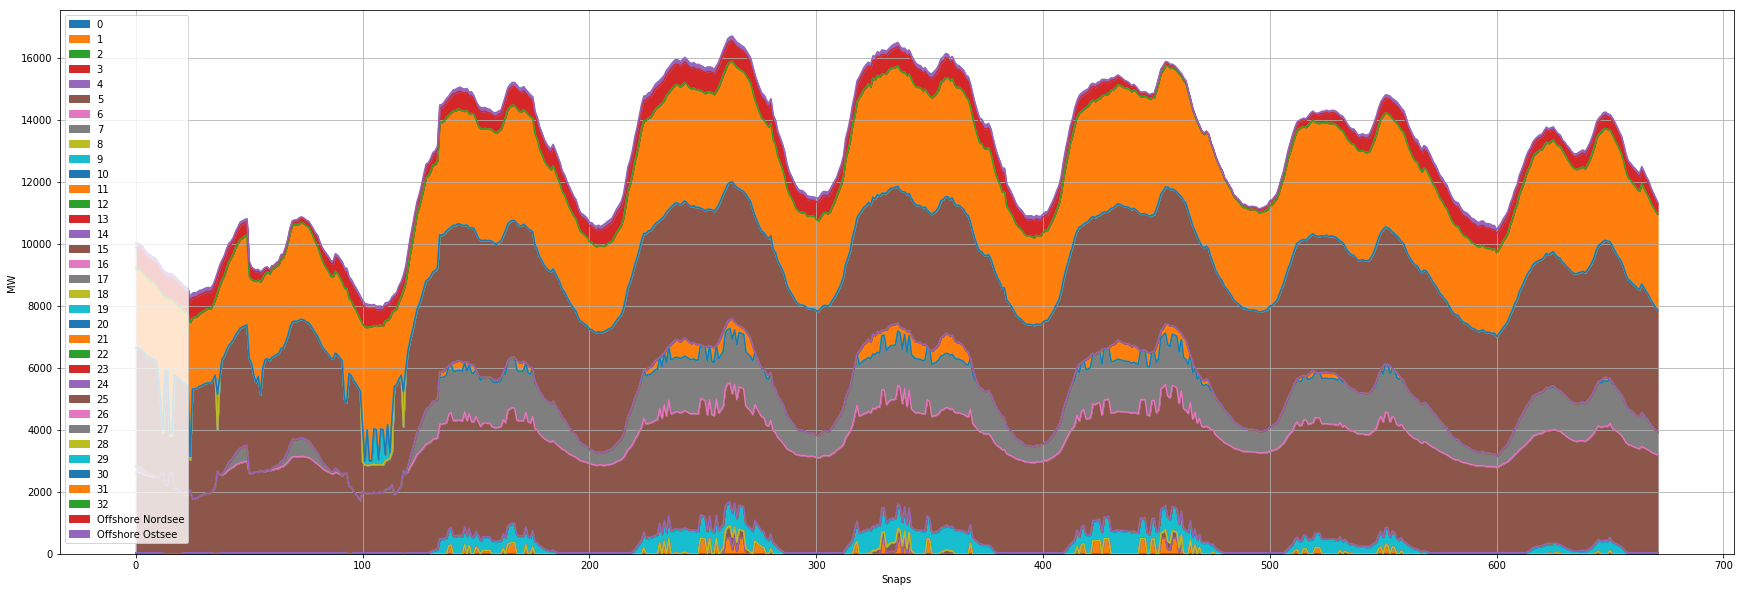

In [38]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(30,10)

(gen_outs).plot(kind="area",ax=ax, grid=True)

ax.set_xlabel("Snaps")
ax.set_ylabel("MW")

Text(0,0.5,'MW')

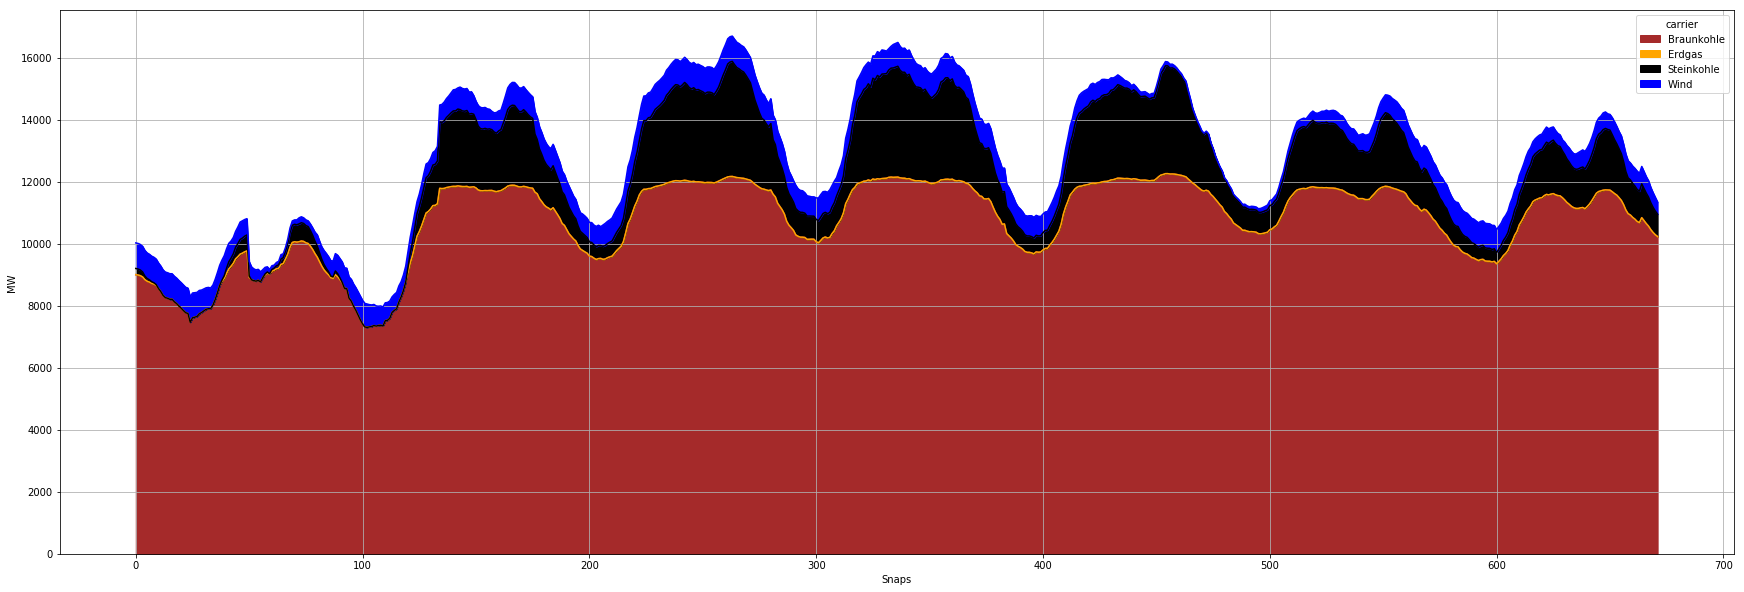

In [39]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(30,10)

power_by_carrier.plot(kind="area",ax=ax, grid=True, color=[graph_colors[i] for i in power_by_carrier.columns])

ax.set_xlabel("Snaps")
ax.set_ylabel("MW")